In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
df_train = pd.read_csv('./train_data.CSV')
df_test = pd.read_csv('./test_data.CSV')
x_train = df_train[['Z1','Z2','r1','r2','R1','R2','N1','N2','EP1','EP2','EA1','EA2','IE1','IE2']]
y_train = df_train['△G*ooh']
x_test = df_test[['Z1','Z2','r1','r2','R1','R2','N1','N2','EP1','EP2','EA1','EA2','IE1','IE2']]
y_test = df_test['△G*ooh']
kf = KFold(n_splits=10,shuffle = True,random_state=10)
clf = RandomForestRegressor()
n_estimators = [30,40,60,80,100,200,300,400,500,600]
random_state = [0,5,10,15,20,30]
param_grid = {'n_estimators':n_estimators,'random_state':random_state}
clf_best = GridSearchCV(clf,param_grid,cv=kf)                                    
clf_best.fit(x_train,y_train)

y_train_pred=clf_best.predict(x_train)
y_test_pred=clf_best.predict(x_test)
train_score_mse = mean_squared_error(y_train,y_train_pred)
test_score_mse = mean_squared_error(y_test,y_test_pred)
train_score_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
test_score_rmse  =  np.sqrt(mean_squared_error(y_test,y_test_pred))
train_score_mae = mean_absolute_error(y_train,y_train_pred)
test_score_mae = mean_absolute_error(y_test,y_test_pred)
train_r2_score = r2_score(y_train,y_train_pred)
test_r2_score = r2_score(y_test,y_test_pred)
print('MSE',train_score_mse,test_score_mse)
print('RMSE',train_score_rmse,test_score_rmse)
print('MAE',train_score_mae,test_score_mae)
print('R2',train_r2_score,test_r2_score)
print("best_params_：",clf_best.best_params_)

MSE 0.13121910430048783 2.223152578480703
RMSE 0.36224177602878416 1.4910240033214432
MAE 0.22609451894736826 0.8664489886363637
R2 0.9874968948092193 0.8363923480690468
best_params_： {'n_estimators': 40, 'random_state': 0}


meta NOT subset; don't know how to subset; dropped


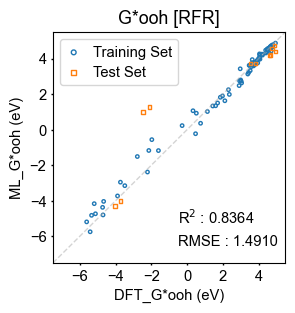

In [2]:
from matplotlib.pyplot import MultipleLocator
font={'family':"Arial",'size':'10.667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize = (3, 3))

ax.scatter(y_train, y_train_pred, label="Training Set",alpha=1, marker='o', s=6, facecolor='none', color='#1f77b4')
ax.scatter(y_test, y_test_pred, label='Test Set',alpha=1, marker='s', s=6, facecolor='none', color='#ff7f0e')
ax.tick_params(axis='both', labelcolor='black', width=1, length=1.1, color='black', which='major')
#ax.tick_params(axis='both', labelcolor='black', width=1, length=2, color='black', which='minor')
#ax.xaxis.set_minor_locator(MultipleLocator(1))
y_major_locator=MultipleLocator(2)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(2)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xlim(xmin= -7.5,xmax = 5.5)
ax.set_ylim(ymin= -7.5,ymax = 5.5)
line=ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='#A9A9A9',alpha=0.5)
plt.setp(line, linewidth=1) 
plt.title('G*ooh [RFR]')
plt.xticks(fontsize=10.667)
plt.yticks(fontsize=10.667)
plt.xlabel('DFT_G*ooh (eV)')
plt.ylabel('ML_G*ooh (eV)')
plt.legend(markerscale=1.4,frameon=True,fontsize=10.667,labelspacing=0.4,handlelength=1)
plt.text(-0.5,-6.5,'R$^2$ : 0.8364\nRMSE : 1.4910',fontsize=10.667,linespacing=1.7)
#plt.savefig('gbr_go.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('gbr_go.png',dpi=600, bbox_inches = "tight")
plt.savefig('rfr_gooh.pdf',dpi=600, bbox_inches = "tight")
plt.show()

meta NOT subset; don't know how to subset; dropped


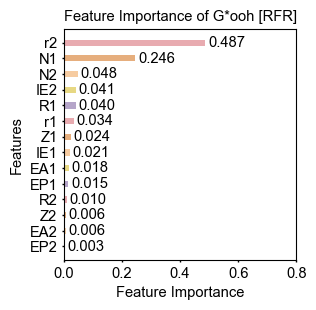

In [3]:
importance = clf_best.best_estimator_.feature_importances_
    
col = zip(x_train, importance)

importance_data = pd.DataFrame(col, columns=['x_train', 'importance'])
importance_data_asc = importance_data.sort_values('importance')

# plot the importance data
font={'family':"Arial",'size':'10.6667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
fig = plt.figure(figsize=(3, 3))
plt.barh(y=importance_data_asc['x_train'], width=importance_data_asc['importance'], height=0.4,color=['#E7D883','#F6CBA0','#E6AE7D','#E8ABB0','#B5A5C9'])
plt.xlim(xmax =0.8)
plt.tick_params(axis='y', labelcolor='black', width=1, length=1.1, color='black')
plt.tick_params(axis='x', labelcolor='black', width=1, length=1.1, color='black')
plt.rc('xtick', labelsize=10.667)
plt.rc('ytick', labelsize=10.667)
plt.ylabel("Features", fontsize=10.667)
plt.xlabel("Feature Importance", fontsize=10.667)
plt.title("Feature Importance of G*ooh [RFR]", fontsize=10.667)

for a,b in zip( importance_data_asc['importance'],importance_data_asc['x_train']):
    plt.text(a+0.01, b,'%.3f'%float(a),fontsize=10.667,va='center')

#plt.savefig('feature_importance_gbr.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('feature_importance_gbr.png',dpi=600, bbox_inches = "tight")
plt.savefig('feature_importance_RFR.pdf',dpi=600, bbox_inches = "tight")
plt.show()

In [4]:
import joblib
joblib.dump(clf_best.best_estimator_, '/home/sun/fangzhaolin/0815/gooh/rfr.pkl')

['/home/sun/fangzhaolin/0815/gooh/rfr.pkl']